In [3]:
import torch
import torch.nn as nn
from torch.optim import SGD
from numpy import *
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
plt.style.use(['science','notebook','grid'])
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

In [4]:
vals = load(r"C:\Users\Nunocastanheira\Desktop\boooks\research\Gelb!\Code\SESSA-Project-main\output\Master.npy")

In [46]:
energy = torch.tensor(vals[0,0,:,0],dtype=torch.float)
counts = torch.tensor(vals[0,:,:,1],dtype=torch.float)
test = torch.tensor(vals[0,0,:,1],dtype=torch.float)*10**7
print(shape(energy))
print(shape(test))
print(energy)
print(test)

torch.Size([2048])
torch.Size([2048])
tensor([ 500.0000,  500.4880,  500.9770,  ..., 1498.5400, 1499.0200,
        1499.5100])
tensor([2.9532, 2.9536, 2.9540,  ..., 0.0036, 0.0036, 0.0036])


In [47]:
def train_model(x,y,f, n_epochs=500):
    opt = SGD(f.parameters(), lr=10**-6)
    L = nn.MSELoss()

    # Train model
    losses = []
    for _ in tqdm(range(n_epochs)):
        opt.zero_grad() 
        loss_value = L(f(x), y)
        loss_value.backward() 
        opt.step() 
        losses.append(loss_value.item())
    return f, losses

class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2048,4096)
        self.Matrix2 = nn.Linear(4096,4096)
        self.Matrix3 = nn.Linear(4096,2048)
        self.R = nn.ReLU()
    def forward(self,x):
        x = self.R(self.Matrix1(x))
        x = self.R(self.Matrix2(x))
        x = self.Matrix3(x)
        return x.squeeze()

x = energy
y = test
f = MyNeuralNet()

# Train model
f, losses = train_model(x,y,f, n_epochs=500)

100%|██████████| 500/500 [00:53<00:00,  9.38it/s]


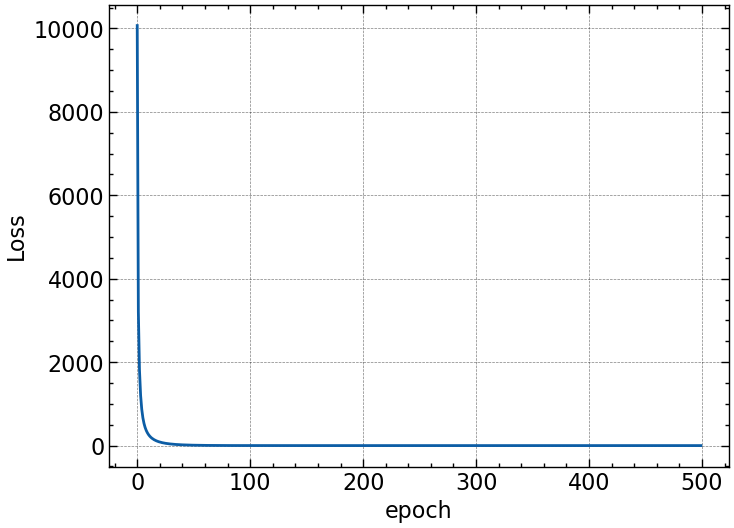

In [52]:
plt.plot(losses)
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.show()

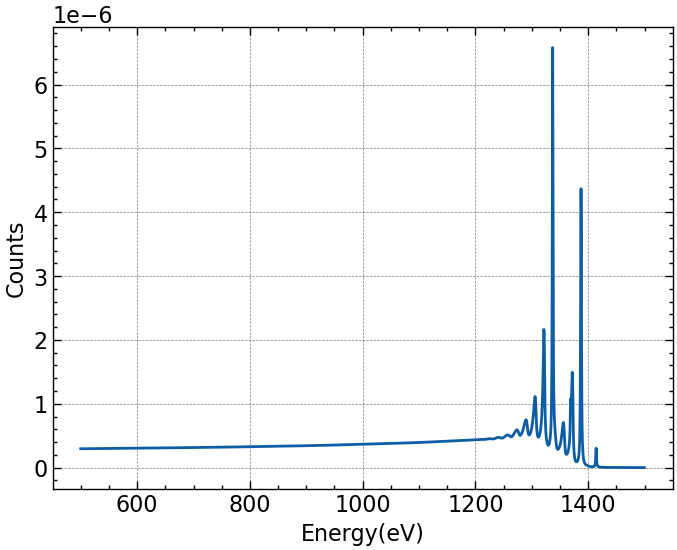

In [54]:
plt.plot(x,f(x).detach().numpy()/10**7)
plt.xlabel("Energy(eV)")
plt.ylabel("Counts")
plt.show()

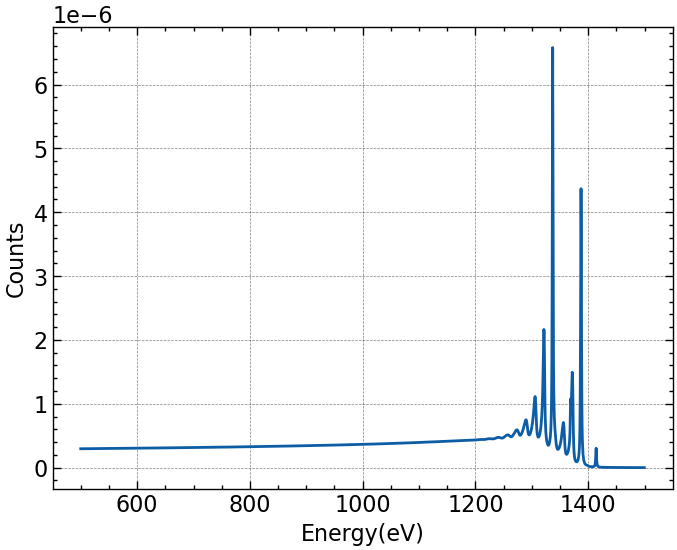

In [56]:
plt.plot(x,y/10**7)
plt.xlabel("Energy(eV)")
plt.ylabel("Counts")
plt.show()

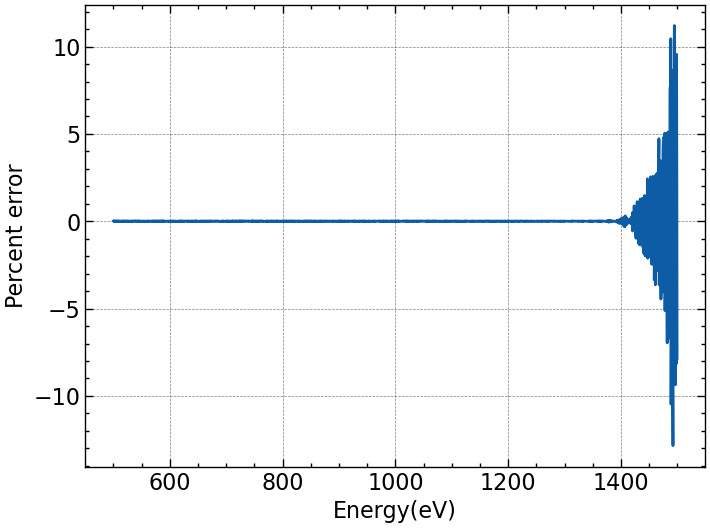

In [57]:
plt.plot(x, (y-f(x).detach().numpy())/y*100)
plt.xlabel("Energy(eV)")
plt.ylabel("Percent error")
plt.show()

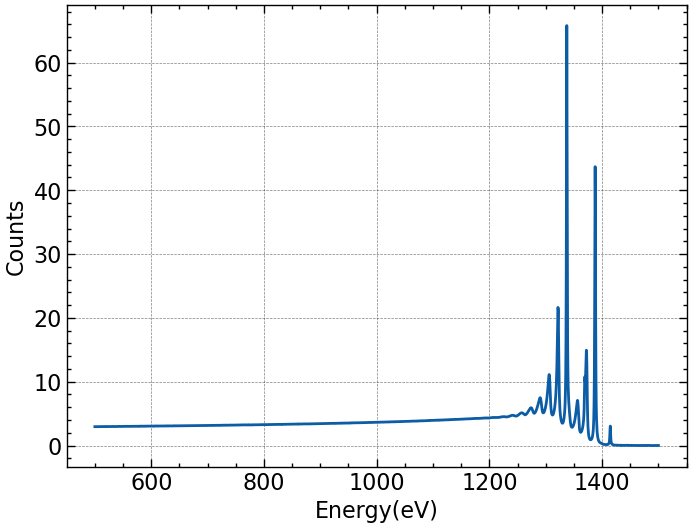

In [58]:
x2 = torch.tensor(linspace(500,1500, 2048), dtype = torch.float)
plt.plot(x2, f(x2).detach().numpy())
plt.xlabel("Energy(eV)")
plt.ylabel("Counts")
plt.show()

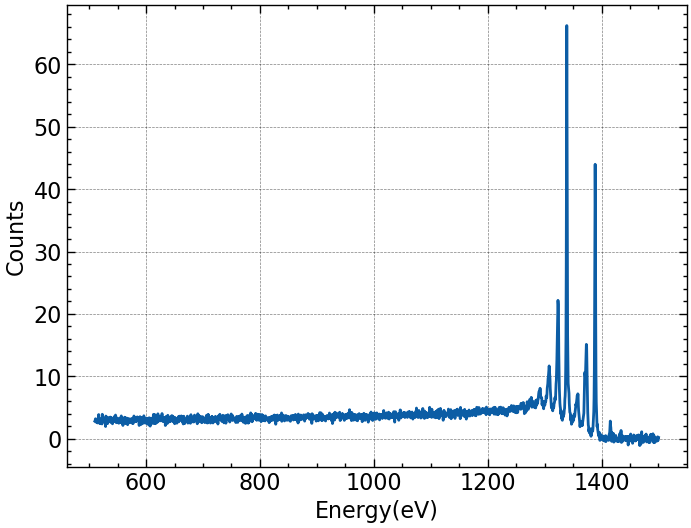

In [59]:
x3 = torch.tensor(linspace(510,1500, 2048), dtype = torch.float)
plt.plot(x3, f(x3).detach().numpy())
plt.xlabel("Energy(eV)")
plt.ylabel("Counts")
plt.show()

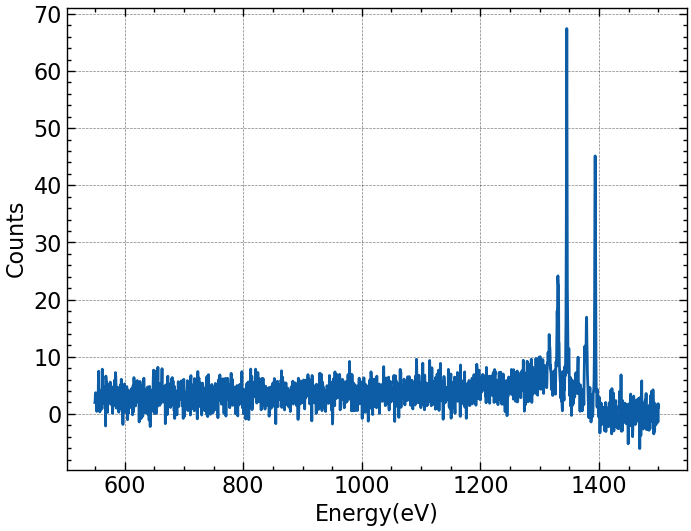

In [60]:
x3 = torch.tensor(linspace(550,1500, 2048), dtype = torch.float)
plt.plot(x3, f(x3).detach().numpy())
plt.xlabel("Energy(eV)")
plt.ylabel("Counts")
plt.show()